<a href="https://colab.research.google.com/github/Ayazdani1997/stock-feature-prediction-final-pro/blob/master/Phase1_OCHLV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas
!pip install tensorflow
!pip install tensorflow-gpu

     |████████████████████████████████| 421.8MB 36kB/s 
     |████████████████████████████████| 3.9MB 36.8MB/s 
     |████████████████████████████████| 450kB 49.0MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=6c12d94e97c99042be46cbc8a97fa1d9f4f0c582484190ba6740715c982f61d8
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow 2.2.0rc3 has requirement gast==0.3.3, but you'll have gast 0.2.2 which is incompatible.
ERROR: tensorflow 2.2.0rc3 has requirement tensorboard<2.3.0,>=2.2.0, but you'll have tensorboard 2.1.1 which is incompatible.
ERROR: tensorflow 2.2.0rc3 has requirement tensorflow-estimator<2.3.0,>=2.2.0rc0, but you'll have tensorflow-estimator 2.1.0 which is incompatible.
ERROR: tensorflow-probability 0.10.0rc0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: tensorboard 2.2.1
    Un

In [2]:
import pandas
import matplotlib.pyplot as plt
from google.colab import drive
from os.path import join
import numpy

ROOT = '/content/drive'
drive.mount(ROOT)
HOME = join(ROOT,'My Drive')
COLAB_DIR = join(HOME, 'Colab Notebooks')
data = pandas.read_csv(join(COLAB_DIR, 'data.csv'), encoding='utf-16')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
data = data.drop(['Unnamed: 0', 'VAL', 'NUM_OF_TRANSACTIONS','CLOSE_ONE_DAY_BEFORE'], axis=1).rename(columns={'DTYYYYMMDD': 'DATE'})
data['DATE'] = pandas.to_datetime(data['DATE'],format='%Y%m%d')
data.head()

,TICKER,DATE,OPEN,HIGH,LOW,CLOSE,VOL
0,مظنه,2019-11-20,0.0,1000000.0,0.0,1000000.0,0
1,مظنه,2019-11-23,0.0,1000000.0,0.0,1000000.0,0
2,مظنه,2019-11-24,0.0,1000000.0,0.0,1000000.0,0
3,مظنه,2019-11-25,0.0,1000000.0,0.0,1000000.0,0
4,مظنه,2019-11-26,0.0,1000000.0,0.0,1000000.0,0


In [4]:
mean_vol_per_ticker = data.groupby('TICKER')['VOL'].agg(numpy.mean).reset_index().sort_values('VOL', ascending=False)
mean_vol_per_ticker.head()

,TICKER,VOL
894,شاخص_قيمت(هم_وزن6),1.560700e+09
895,شاخص_قيمت6,1.559693e+09
898,شاخص_كل_(هم_وزن)6,1.559693e+09
889,شاخص_آزاد_شناور6,9.130124e+08
897,شاخص_كل6,8.711138e+08


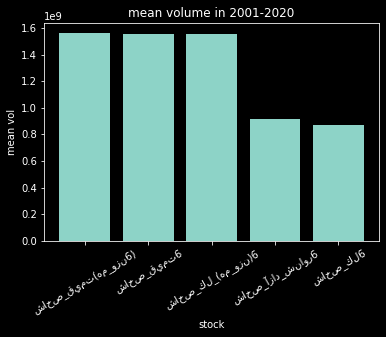

In [5]:
 plt.style.use('dark_background')
 five_first_stocks_with_mean_vol = mean_vol_per_ticker.head()
 index = numpy.arange(len(five_first_stocks_with_mean_vol['TICKER']))
 plt.bar(index, five_first_stocks_with_mean_vol['VOL'])
 plt.xlabel('stock', fontsize=10)
 plt.ylabel('mean vol', fontsize=10)
 plt.xticks(index, five_first_stocks_with_mean_vol['TICKER'], fontsize=10, rotation=30)
 plt.title('mean volume in 2001-2020')
 plt.show()

In [6]:
data_for_ticker_with_max_mean_vol = data[ data['TICKER'] == mean_vol_per_ticker.head().iloc[0]['TICKER'] ]
data_for_ticker_with_max_mean_vol.head()

,TICKER,DATE,OPEN,HIGH,LOW,CLOSE,VOL
3004878,شاخص_قيمت(هم_وزن6),2015-02-24,9198.4,9181.8,9181.8,9181.8,278521094
3004879,شاخص_قيمت(هم_وزن6),2015-02-25,9183.3,9109.1,9109.2,9109.1,271188153
3004880,شاخص_قيمت(هم_وزن6),2015-02-28,9111.9,9090.0,9090.0,9090.0,257849083
3004881,شاخص_قيمت(هم_وزن6),2015-03-01,9014.4,9030.4,9009.0,9030.4,475683577
3004882,شاخص_قيمت(هم_وزن6),2015-03-02,9034.4,9043.5,9034.4,9043.5,717632564


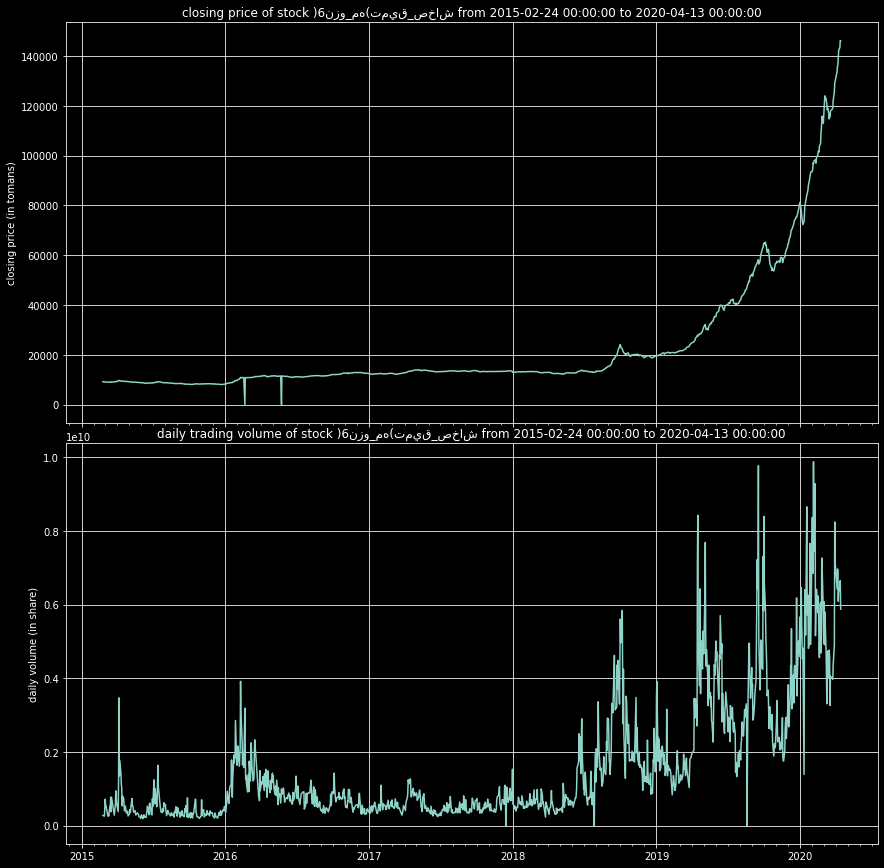

In [7]:
import matplotlib.dates as mdates

fig, axs = plt.subplots(2, 1, sharex=True, figsize=(12,12))
fig.tight_layout()

ax1 = axs[0]
ax2 = axs[1]
starting_date = str(data_for_ticker_with_max_mean_vol['DATE'].iloc[0])
ending_date = str(data_for_ticker_with_max_mean_vol['DATE'].iloc[len(data_for_ticker_with_max_mean_vol) - 1])

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
years_fmt = mdates.DateFormatter('%Y')

ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)


ax1.plot(data_for_ticker_with_max_mean_vol['DATE'], data_for_ticker_with_max_mean_vol['CLOSE'])
ax1.set(ylabel='closing price (in tomans)')
ax1.set_title('closing price of stock ' + data_for_ticker_with_max_mean_vol['TICKER'].iloc[0][::-1] + 
          ' from ' + starting_date + ' to ' + ending_date)
ax2.plot(data_for_ticker_with_max_mean_vol['DATE'], data_for_ticker_with_max_mean_vol['VOL'])
ax2.set(ylabel='daily volume (in share)')
ax2.set_title('daily trading volume of stock ' + data_for_ticker_with_max_mean_vol['TICKER'].iloc[0][::-1] + 
          ' from ' + starting_date + ' to ' + ending_date)

ax1.grid(True)
ax2.grid(True)

ax1.format_xdata = mdates.DateFormatter('%Y-%m-%d')
ax1.format_ydata = lambda x: '$%1.2f' % x  # format the price.

plt.show()

In [8]:
ten_stocks_with_max_trading_per_day = data.groupby('TICKER').agg({'DATE': ['min', 'max', 'count'], 'VOL': ['mean']}).reset_index().sort_values(('DATE', 'count'), ascending=False).head(10)
stock_with_max_trading_per_day = ten_stocks_with_max_trading_per_day['TICKER'].iloc[0]
ten_stocks_with_max_trading_per_day.head(10)

TICKER       DATE                            VOL
                   min        max count          mean
1616  وپترو 2001-03-25 2020-04-13  4366  2.323352e+06
1522  وساخت 2001-03-25 2020-04-13  4356  1.464725e+06
56    آريان 2010-10-06 2020-04-13  4347  2.723661e+06
624   خودرو 2001-03-25 2020-04-13  4340  1.123416e+07
1539   وسپه 2001-03-27 2020-04-13  4323  2.620691e+06
753   زنجان 2011-01-05 2020-04-13  4318  9.637195e+05
567   خبهمن 2001-04-07 2020-04-13  4315  6.061205e+06
1603  ونيكي 2001-04-07 2020-04-13  4302  1.712802e+06
900   شاراك 2001-03-27 2020-04-13  4298  2.342162e+06
1474  وبشهر 2001-03-25 2020-04-13  4291  2.265908e+06

In [0]:

window_in_days = 10
horizon_in_days = 1

def push_padding_to_dataframe_to_front(dataframe, window_in_days):
  for _ in range(window_in_days):
    row_to_insert = [0.0 for _ in dataframe.columns]
    dataframe.loc[-1] = row_to_insert
    dataframe.index = dataframe.index + 1
    dataframe = dataframe.sort_index()
    dataframe = dataframe.reset_index(drop=True)
  return dataframe


def normalize_dataframe_with_max_min(dataframe, train_max, train_min):
    normalized_df=(dataframe - train_min)/(train_max - train_min)
    return normalized_df


def generate_datasets_for_model(original_dataset, stock, training_start, training_end, testing_start, testing_end, window_in_days=10, batch_size=32):
  data_related_to_stock = original_dataset[ original_dataset['TICKER'] == stock ]
  data_related_to_stock = data_related_to_stock.drop('TICKER', axis=1)

 
  training_period_mask = (data_related_to_stock['DATE'] >= training_start) & (data_related_to_stock['DATE'] <= training_end )
  testing_period_mask = (data_related_to_stock['DATE'] >= testing_start) & (data_related_to_stock['DATE'] <= testing_end )

  training_period = data_related_to_stock.loc[training_period_mask]
  testing_period = data_related_to_stock.loc[testing_period_mask]


  # training_period, validation_period = numpy.split(training_period, [int(.8*len(training_period))])


  training_period.drop('DATE', axis=1)
  testing_period.drop('DATE', axis=1)

  #training_period = push_padding_to_dataframe_to_front(training_period.copy(), (batch_size - (len(training_period) - window_in_days) ) % batch_size)
  # validation_period = push_padding_to_dataframe_to_front(validation_period.copy(), window_in_days) 
  #testing_period = push_padding_to_dataframe_to_front(testing_period.copy(), window_in_days)




  training_period_labels = numpy.where(training_period['CLOSE'] > training_period['CLOSE'].shift(1), 1.0, 0.0)
  # validation_period_labels = numpy.where(validation_period['CLOSE'] > validation_period['CLOSE'].shift(1), 1.0, 0.0) 
  testing_period_labels = numpy.where(testing_period['CLOSE'] > testing_period['CLOSE'].shift(1), 1.0, 0.0)

  training_period = training_period.drop('DATE', axis=1)
  # validation_period = validation_period.drop('DATE', axis=1)
  testing_period = testing_period.drop('DATE', axis=1)

  training_period = normalize_dataframe_with_max_min(training_period, training_period.max(), training_period.min())
  # validation_period = normalize_dataframe(validation_period, training_period.mean(), training_period.std())
  testing_period = normalize_dataframe_with_max_min(testing_period, training_period.max(), training_period.min())

  training_data = []
  training_labels = []

  for j in range(window_in_days, len(training_period)):
    training_data.append(numpy.array(training_period[ j - window_in_days : j ].copy()))
    training_labels.append(training_period_labels[j])

  training_data = numpy.array(training_data)
  training_labels = numpy.array(training_labels)

  # validation_data = []
  # validation_labels = []

  
  # for j in range(window_in_days, len(validation_period)):
  #   validation_data.append(numpy.array(validation_period[ j - window_in_days : j ].copy()))
  #   validation_labels.append(validation_period_labels[j])

  # validation_data = numpy.array(validation_data)
  # validation_labels = numpy.array(validation_labels)


  testing_data = []
  testing_labels = []


  for j in range(window_in_days, len(testing_period)):
    testing_data.append(numpy.array(testing_period[ j - window_in_days : j ].copy()))
    testing_labels.append(testing_period_labels[j])
  
  testing_data = numpy.array(testing_data)
  testing_labels = numpy.array(testing_labels)


  return training_data, training_labels, testing_data, testing_labels



**First of all, we train the model with training set and testing set containing information in the range indicated periods in the code. we first set the window length to 10 days.**

In [0]:
training_start = pandas.to_datetime('20010101', format='%Y%m%d', errors='ignore')
training_end = pandas.to_datetime('20170919', format='%Y%m%d', errors='ignore')
testing_start = pandas.to_datetime('20180101', format='%Y%m%d', errors='ignore')
testing_end = pandas.to_datetime('20180719', format='%Y%m%d', errors='ignore')

training_data, training_labels, testing_data, testing_labels = \
      generate_datasets_for_model(data, stock_with_max_trading_per_day, training_start, training_end, testing_start, testing_end)

In [44]:
import tensorflow.keras as keras

from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense, Activation, Dropout
from keras.layers import BatchNormalization
from keras.metrics import BinaryAccuracy

def build_model(input_shape):
  model = Sequential()
  model.add(LSTM(64, input_shape=(input_shape[1], input_shape[2])))
  model.add(Dense(32))
  model.add(Dropout(0.1))
  model.add(Dense(16))
  model.add(BatchNormalization())
  model.add(Dense(4))
  model.add(Dense(1))
  model.add(Activation('sigmoid'))

  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[BinaryAccuracy()])


  return model


model = build_model(training_data.shape)
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, 64)                17920     
_________________________________________________________________
dense_29 (Dense)             (None, 32)                2080      
_________________________________________________________________
dropout_8 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_30 (Dense)             (None, 16)                528       
_________________________________________________________________
batch_normalization_8 (Batch (None, 16)                64        
_________________________________________________________________
dense_31 (Dense)             (None, 4)                 68        
_________________________________________________________________
dense_32 (Dense)             (None, 1)                

In [45]:
history = model.fit(training_data, training_labels,
                    batch_size=32,
                    epochs=200,
                    validation_split=0.2)

Train on 2990 samples, validate on 748 samples
Epoch 1/200
2990/2990 [==============================] - 2s 743us/step - loss: 0.6720 - binary_accuracy: 0.6043 - val_loss: 0.6671 - val_binary_accuracy: 0.6096
Epoch 2/200
2990/2990 [==============================] - 2s 530us/step - loss: 0.6585 - binary_accuracy: 0.6027 - val_loss: 0.6592 - val_binary_accuracy: 0.6096
Epoch 3/200
2990/2990 [==============================] - 2s 530us/step - loss: 0.6542 - binary_accuracy: 0.6127 - val_loss: 0.6521 - val_binary_accuracy: 0.6096
Epoch 4/200
2990/2990 [==============================] - 2s 519us/step - loss: 0.6534 - binary_accuracy: 0.6147 - val_loss: 0.6506 - val_binary_accuracy: 0.6096
Epoch 5/200
2990/2990 [==============================] - 2s 518us/step - loss: 0.6524 - binary_accuracy: 0.6154 - val_loss: 0.6390 - val_binary_accuracy: 0.6123
Epoch 6/200
2990/2990 [==============================] - 2s 532us/step - loss: 0.6518 - binary_accuracy: 0.6147 - val_loss: 0.6365 - val_binary_accu

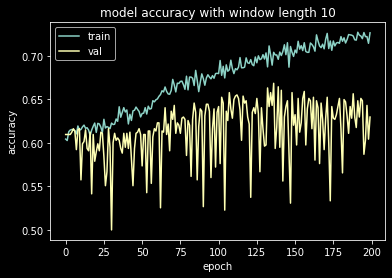

In [46]:
plt.plot(history.history['binary_accuracy'])
plt.plot(history.history['val_binary_accuracy'])
plt.title('model accuracy with window length 10')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

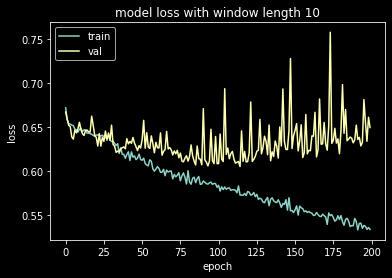

In [47]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss with window length 10')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [48]:
results = model.evaluate(testing_data, testing_labels)
print('for window length 10 we have: test loss, test acc:', results)

118/118 [==============================] - 0s 212us/step
for window length 10 we have: test loss, test acc: [0.7534843248836065, 0.5593220591545105]


**Next, we train the model with window size 20 to see how the increase of window size affects the test accuracy**

In [49]:
training_data, training_labels, testing_data, testing_labels = \
      generate_datasets_for_model(data, stock_with_max_trading_per_day, training_start, training_end, testing_start, testing_end, window_in_days=20)

model = build_model(training_data.shape)

model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_9 (LSTM)                (None, 64)                17920     
_________________________________________________________________
dense_33 (Dense)             (None, 32)                2080      
_________________________________________________________________
dropout_9 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_34 (Dense)             (None, 16)                528       
_________________________________________________________________
batch_normalization_9 (Batch (None, 16)                64        
_________________________________________________________________
dense_35 (Dense)             (None, 4)                 68        
_________________________________________________________________
dense_36 (Dense)             (None, 1)                

In [50]:
history = model.fit(training_data, training_labels,
                    batch_size=32,
                    epochs=200,
                    validation_split=0.2)

Train on 2982 samples, validate on 746 samples
Epoch 1/200
2982/2982 [==============================] - 3s 1ms/step - loss: 0.6778 - binary_accuracy: 0.5805 - val_loss: 0.6675 - val_binary_accuracy: 0.6113
Epoch 2/200
2982/2982 [==============================] - 2s 830us/step - loss: 0.6570 - binary_accuracy: 0.6093 - val_loss: 0.6562 - val_binary_accuracy: 0.6113
Epoch 3/200
2982/2982 [==============================] - 2s 813us/step - loss: 0.6515 - binary_accuracy: 0.6103 - val_loss: 0.6508 - val_binary_accuracy: 0.6113
Epoch 4/200
2982/2982 [==============================] - 2s 828us/step - loss: 0.6493 - binary_accuracy: 0.6123 - val_loss: 0.6408 - val_binary_accuracy: 0.6126
Epoch 5/200
2982/2982 [==============================] - 2s 818us/step - loss: 0.6475 - binary_accuracy: 0.6130 - val_loss: 0.6361 - val_binary_accuracy: 0.6139
Epoch 6/200
2982/2982 [==============================] - 2s 815us/step - loss: 0.6525 - binary_accuracy: 0.6076 - val_loss: 0.6337 - val_binary_accura

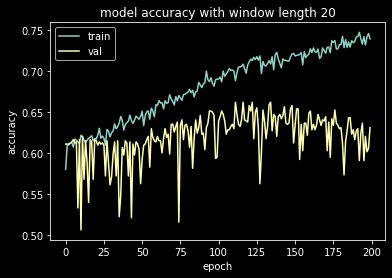

In [51]:
plt.plot(history.history['binary_accuracy'])
plt.plot(history.history['val_binary_accuracy'])
plt.title('model accuracy with window length 20')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

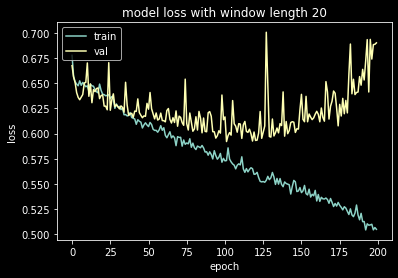

In [52]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss with window length 20')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [53]:
results = model.evaluate(testing_data, testing_labels)
print('for window length 20 we have: test loss, test acc:', results)

108/108 [==============================] - 0s 308us/step
for window length 20 we have: test loss, test acc: [20.412164440861456, 0.6111111044883728]


**And finally, we set the window length to 30 days.**

In [54]:
training_data, training_labels, testing_data, testing_labels = \
      generate_datasets_for_model(data, stock_with_max_trading_per_day, training_start, training_end, testing_start, testing_end, window_in_days=30)

model = build_model(training_data.shape)

model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_10 (LSTM)               (None, 64)                17920     
_________________________________________________________________
dense_37 (Dense)             (None, 32)                2080      
_________________________________________________________________
dropout_10 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_38 (Dense)             (None, 16)                528       
_________________________________________________________________
batch_normalization_10 (Batc (None, 16)                64        
_________________________________________________________________
dense_39 (Dense)             (None, 4)                 68        
_________________________________________________________________
dense_40 (Dense)             (None, 1)               

In [55]:
history = model.fit(training_data, training_labels,
                    batch_size=32,
                    epochs=200,
                    validation_split=0.2)

Train on 2974 samples, validate on 744 samples
Epoch 1/200
2974/2974 [==============================] - 4s 1ms/step - loss: 0.6922 - binary_accuracy: 0.5703 - val_loss: 0.6642 - val_binary_accuracy: 0.6102
Epoch 2/200
2974/2974 [==============================] - 3s 1ms/step - loss: 0.6572 - binary_accuracy: 0.6063 - val_loss: 0.6571 - val_binary_accuracy: 0.6102
Epoch 3/200
2974/2974 [==============================] - 3s 1ms/step - loss: 0.6536 - binary_accuracy: 0.6153 - val_loss: 0.6497 - val_binary_accuracy: 0.6102
Epoch 4/200
2974/2974 [==============================] - 3s 1ms/step - loss: 0.6524 - binary_accuracy: 0.6137 - val_loss: 0.6451 - val_binary_accuracy: 0.6156
Epoch 5/200
2974/2974 [==============================] - 3s 1ms/step - loss: 0.6510 - binary_accuracy: 0.6157 - val_loss: 0.6430 - val_binary_accuracy: 0.5766
Epoch 6/200
2974/2974 [==============================] - 3s 1ms/step - loss: 0.6516 - binary_accuracy: 0.6079 - val_loss: 0.6641 - val_binary_accuracy: 0.6129

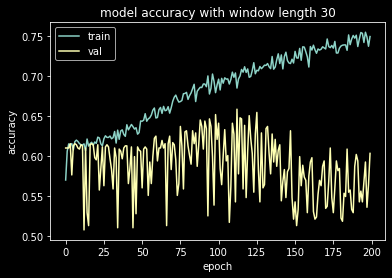

In [56]:
plt.plot(history.history['binary_accuracy'])
plt.plot(history.history['val_binary_accuracy'])
plt.title('model accuracy with window length 30')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

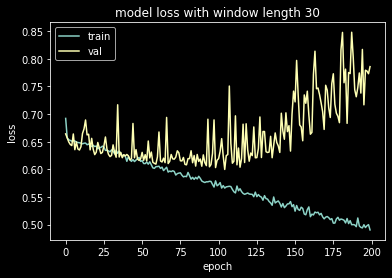

In [57]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss with window length 30')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [59]:
results = model.evaluate(testing_data, testing_labels)
print('for window length 30 we have: test loss, test acc:', results)

98/98 [==============================] - 0s 323us/step
for window length 30 we have: test loss, test acc: [6.699053336162956, 0.3979591727256775]
